<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe%204%20-%20HeapSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Descripción del problema

Entrada: Secuencia de n números $[a1, a2, ..., an]$

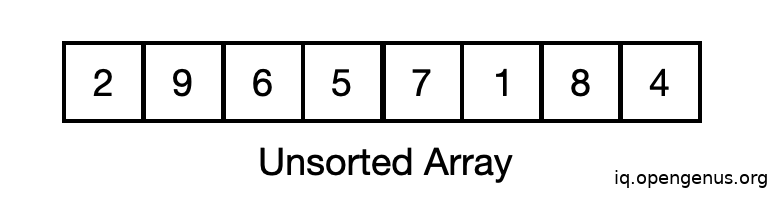

Salida: Permutación ordenada de la secuencia de entrada de tal manera que $a1 < a2 <...< an$

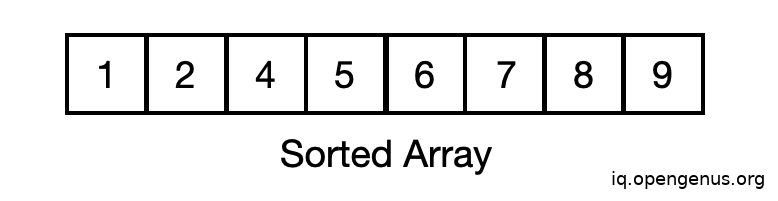



La necesidad de organizar elementos es un problema común que se presenta dentro de área informática, teniendo diversos métodos a elegir cada uno con sus propias ventajas y desventajas.

En esta situación, vamos a analizar el algoritmo heapsort.

#2-Código

In [3]:
def heapify(arr, largo, i, verbose = False):
  comparaciones = 0

  max = i

  #Nodos hoja
  izq = 2*i+1
  der = 2*i+2

  if verbose:
    print("Arreglo recibido:", arr)
    print("Comprobación elemento", arr[i])

  #Comprobar si existe el nodo izquierdo
  comparaciones+=1
  if izq < largo:

    if verbose:
      print("Hijo izquierdo de", arr[i], "es", arr[izq])

    #Comprobar si el nodo izquierdo es más grande
    comparaciones+=1
    if arr[izq] > arr[max]:
      max = izq
      if verbose:
        print(arr[izq], ">", arr[i])
  
  #Comprobar si el nodo derecho existe
  comparaciones+=1
  if der < largo:
    if verbose:
      print("Hijo derecho de", arr[i], "es", arr[der])

    #Comprobar si el nodo derecho es el más grande
    comparaciones+=1
    if arr[der] > arr[max]:
      max = der
      if verbose:
        print(arr[der], ">", arr[i])

  #Hacer intercambios si la raíz no es el más grande
  if max != i:
    aux = arr[i]
    arr[i] = arr[max]
    arr[max] = aux

    if verbose:
      print("Se intercambia", arr[max], "por", arr[i])
      print("El arreglo queda como:", arr)
      print("")

    comparaciones += heapify(arr, largo, max, verbose)
  
  else:

    if verbose:
      print("El", arr[i], "cumple la condicion, el arreglo no cambia\n")

  return comparaciones

def heapSort(arr, verbose = False):

  comparaciones = 0
  #Construcción del max heap

  if verbose:
    print("Contruccion del max heap\n")

  for i in range(len(arr)//2 -1, -1, -1):
    comparaciones += heapify(arr, len(arr), i, verbose)

  if verbose:
    print("Max heap contruido!\n")
    print("Organización de elementos:\n")

  #Organizar elementos

  for i in range(len(arr)-1, 0, -1):
    #Se coloca el elemento raiz en la última posición

    aux = arr[i]
    arr[i] = arr[0]
    arr[0] = aux

    if verbose:
      print("Se intercambia el", aux, "Con la ultima posicion y se deja de considerar")
      print(arr[:i], arr[i:])
    
    #Se reorganiza el max heap de nuevo

    comparaciones += heapify(arr, i, 0, False)

    if verbose:
      print("Se reorganiza el max heap")
      print(arr[:i], arr[i:])

  return comparaciones

if __name__ == '__main__':
    arr = [5,8,14,9,17,10,1,3]
    print("Arreglo desordenado:", arr)
    print("")

    heapSort(arr)
    N = len(arr)
 
    print("\nArreglo ordenado:", arr)

Arreglo desordenado: [5, 8, 14, 9, 17, 10, 1, 3]


Arreglo ordenado: [1, 3, 5, 8, 9, 10, 14, 17]


#2.1- Descripción del algoritmo

Para poder comprender heapsort primero hay que visualizar el arreglo como un árbol: 
Cada elemento en la posición A[i] del arreglo se puede vizualizar como un nodo de un árbol, siendo sus hijos los elementos A[2*i+1] y A[2*i+2] (Siempre y cuando dichas posiciones existan).



El algoritmo heapsort se divide en dos secciones:

**-Armar un max heap**

Para armar un max heap se debe comprobar si cada nodo es mayor a sus nodos hoja, de no cumplirse la condición, se intercambia con su mayor hijo .

**-Posicionar el nodo raíz al final del arreglo**

Para realizar este paso hay que intercambiar el elemento en la última posición del arreglo por el nodo raíz, luego, se repite el proceso del max heap con la nueva raíz, después la penúltima posición pasará a considerarse la última para los siguientes intercambios, repitiendo el proceso hasta que se haya sacado todos los elementos del arreglo, obteniendo como resultado un arreglo ordenado.

#2.2- Ejemplo de ejecución

Para el ejemplo consideremos el siguiente arreglo unidimensional: 

A = [1,3,2,7,4,9]

-Se intercambia el 2 con el 9 

A = [1,3,**9**,7,4,**2**]

-Se intercambia el 3 con el 7

A = [1,**7**,9,**3**,4,2]

-Se intercambia el 1 con el 9

A =[**9**,7,**1**,3,4,2]

-Se intercambia el 1 con el 2

A = [9,7,**2**,3,4,**1**]

El max heap está construido.

Constucción del arreglo ordenado:

Se intercambia el nodo raíz con la última posición, luego esta se "saca" del arreglo, y el nuevo nodo raiz se reorganiza.

A = [1,7,2,3,4] [9]

A = [7,4,2,3,1] [9]

A = [1,4,2,3] [7,9]

A = [4,3,2,1] [7,9]

A = [1,3,2] [4,7,9]

A = [3,1,2] [4,7,9]

A = [2,1] [3,4,7,9]

A = [1] [2,3,4,7,9]

Al final se optiene un arreglo ordenado:

A = [1,2,3,4,7,9]



#2.3- Ejecución paso a paso

Utilizando la opción verbose = True, podemos observar el funcionamiento del algoritmo:


    Arreglo desordenado: [5, 8, 14, 9, 17, 10, 12, 3, 2, 0]

**Contruccion del max heap**

    Arreglo recibido: [5, 8, 14, 9, 17, 10, 12, 3, 2, 0]

Comprobación elemento 17

Hijo izquierdo de 17 es 0

El 17 cumple la condicion, el arreglo no cambia


    Arreglo recibido: [5, 8, 14, 9, 17, 10, 12, 3, 2, 0]
Comprobación elemento 9

Hijo izquierdo de 9 es 3

Hijo derecho de 9 es 2

El 9 cumple la condicion, el arreglo no cambia


    Arreglo recibido: [5, 8, 14, 9, 17, 10, 12, 3, 2, 0]
Comprobación elemento 14

Hijo izquierdo de 14 es 10

Hijo derecho de 14 es 12

El 14 cumple la condicion, el arreglo no cambia

    Arreglo recibido: [5, 8, 14, 9, 17, 10, 12, 3, 2, 0]
Comprobación elemento 8

Hijo izquierdo de 8 es 9

9 > 8

Hijo derecho de 8 es 17

17 > 8

Se intercambia 8 por 17

    El arreglo queda como: [5, 17, 14, 9, 8, 10, 12, 3, 2, 0]

    Arreglo recibido: [5, 17, 14, 9, 8, 10, 12, 3, 2, 0]
Comprobación elemento 8

Hijo izquierdo de 8 es 0

El 8 cumple la condicion, el arreglo no cambia

    Arreglo recibido: [5, 17, 14, 9, 8, 10, 12, 3, 2, 0]
Comprobación elemento 5

Hijo izquierdo de 5 es 17

17 > 5

Hijo derecho de 5 es 14

Se intercambia 5 por 17

    El arreglo queda como: [17, 5, 14, 9, 8, 10, 12, 3, 2, 0]

    Arreglo recibido: [17, 5, 14, 9, 8, 10, 12, 3, 2, 0]
Comprobación elemento 5

Hijo izquierdo de 5 es 9

9 > 5

Hijo derecho de 5 es 8

Se intercambia 5 por 9

    El arreglo queda como: [17, 9, 14, 5, 8, 10, 12, 3, 2, 0]

    Arreglo recibido: [17, 9, 14, 5, 8, 10, 12, 3, 2, 0]
Comprobación elemento 5

Hijo izquierdo de 5 es 3

Hijo derecho de 5 es 2

El 5 cumple la condicion, el arreglo no cambia

**Max heap contruido!**

**Organización de elementos:**

Se intercambia el 0 Con la ultima posicion y se deja de considerar
[0, 9, 14, 5, 8, 10, 12, 3, 2] [17]

Se reorganiza el max heap
[14, 9, 12, 5, 8, 10, 0, 3, 2] [17]

Se intercambia el 2 Con la ultima posicion y se deja de considerar
[2, 9, 12, 5, 8, 10, 0, 3] [14, 17]

Se reorganiza el max heap
[12, 9, 10, 5, 8, 2, 0, 3] [14, 17]

Se intercambia el 3 Con la ultima posicion y se deja de considerar
[3, 9, 10, 5, 8, 2, 0] [12, 14, 17]

Se reorganiza el max heap
[10, 9, 3, 5, 8, 2, 0] [12, 14, 17]

Se intercambia el 0 Con la ultima posicion y se deja de considerar
[0, 9, 3, 5, 8, 2] [10, 12, 14, 17]

Se reorganiza el max heap
[9, 8, 3, 5, 0, 2] [10, 12, 14, 17]

Se intercambia el 2 Con la ultima posicion y se deja de considerar
[2, 8, 3, 5, 0] [9, 10, 12, 14, 17]

Se reorganiza el max heap
[8, 5, 3, 2, 0] [9, 10, 12, 14, 17]

Se intercambia el 0 Con la ultima posicion y se deja de considerar
[0, 5, 3, 2] [8, 9, 10, 12, 14, 17]

Se reorganiza el max heap
[5, 2, 3, 0] [8, 9, 10, 12, 14, 17]

Se intercambia el 0 Con la ultima posicion y se deja de considerar
[0, 2, 3] [5, 8, 9, 10, 12, 14, 17]

Se reorganiza el max heap
[3, 2, 0] [5, 8, 9, 10, 12, 14, 17]

Se intercambia el 0 Con la ultima posicion y se deja de considerar
[0, 2] [3, 5, 8, 9, 10, 12, 14, 17]

Se reorganiza el max heap
[2, 0] [3, 5, 8, 9, 10, 12, 14, 17]

Se intercambia el 0 Con la ultima posicion y se deja de considerar
[0] [2, 3, 5, 8, 9, 10, 12, 14, 17]

Se reorganiza el max heap
[0] [2, 3, 5, 8, 9, 10, 12, 14, 17]

Arreglo ordenado: [0, 2, 3, 5, 8, 9, 10, 12, 14, 17]

#3-Correctitud

**Teorema**: Heapsort recibe un arreglo de largo n y devuelve un arreglo de largo n con sus elementos en orden ascendente.


**Prueba del teorema mediante la propiedad del bucle invariante:**

**Inicialización**:

Al inicio del ciclo, el subarreglo $A[0 ... i]$ se compone de un sólo elemento, por lo que trivialmente se considera que la propiedad es correcta.

**Mantención**: 

Al comienzo de cada iteración se comprueba que el elemento i cumpla con la condición $A[i] > A[2i+1]$ y $A[i] > A[2i+2]$, de no complirse esta condición, $A[i]$ se intercambia por su hijo de mayor valor, luego, tras construir el max heap, el elemento en $A[0]$ será siempre el mayor elemento del arreglo de largo n, este se intercambia por $A[n]$ y n se reduce en 1, por lo que siempre el elemento $A[n]$ será el mayor y $A[n]$ < $A[n+1]$ siempre y cuando exista $A[n+1]$.

**Finalización**:

Como siempre se ubicará el mayor elemento en n, y luego n se reducirá en 1, al terminar las iteraciones se habrán reposicionado los elementos de menor a mayor, por lo que el teorema es correcto.


#4-Complejidad temporal

Heapsort cuenta con una complejida temporal en todos los casos de $O(n * log n)$

Prueba de la complejidad:

Para la construcción del max heap, en la función heapify comprobamos los elementos del arreglo con sus hijos izquierdo y derecho, moviendo hacia abajo el elemento que estamos comparando hasta que llegue a un punto en que sea mayor que sus dos hijos, en el peor caso posible, tendríamos que mover el elemento raiz hasta el último nivel del árbol, realizando $log(n)$ comparaciones en el proceso.

En el caso del proceso de ordenamiento, intercambiamos el elemento raiz con el último elemento del arreglo y luego aplicamos la función heapify para reestructurar el max heap, este proceso toma un tiempo de $log(n)$ y debido a que lo aplicamos para cada elemento del arreglo de largo $n$, obtenemos un tiempo de ejecución de $n*log(n)$.

Debido a que ambos procesos se realizan de manera secuencial, no se multiplican y optenemos que la complejidad temporal es de $O(n*log n)$




#5-Experimentos

#5.1-Comparación entrada con arreglo creciente, decreciente y aleatorio

En el siguiente experimento observaremos en número de comparaciones de un arreglo tal que $[a1 < a2 < ... an$] , $[a1 > a2 > ... an]$ y con valores generados de manera aleatoria

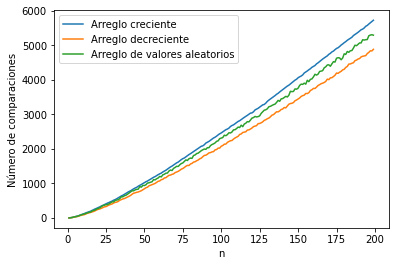

In [5]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(1,200)] 
y=[]; y2=[]; y3=[]

for n in range(1,200):

  b = [n for n in range(0,n)]
  counter = heapSort(b)
  y.append(counter)

  c = [n for n in range(n,0,-1)]
  counter = heapSort(c)
  y2.append(counter)

  a = random.sample(range(1, 200), n)
  counter = heapSort(a)
  y3.append(counter)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Arreglo creciente", "Arreglo decreciente", "Arreglo de valores aleatorios"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

**Analisis de resultados:**

Podemos observar en la gráfica una diferencia en el número de comparaciones del arreglo ordenado de manera decreciente vs el arreglo ordenado de manera creciente, esto se debe a que en la construcción del max heap no hay que realizar intercambios en el caso del arreglo decreciente, mientras que con el arreglo creciente hay que realizar la mayor cantidad de intercambios, y por esta misma razón el caso promedio se encuentra entre ambos casos.

#5.2 Comparativa del tiempo de ejecución entre Heapsor y Mergesort

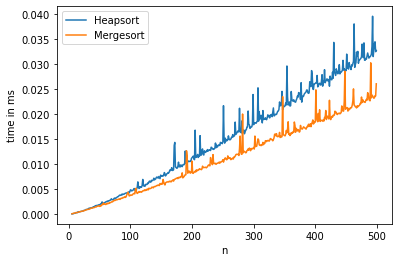

In [7]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; x2=[]; y=[]; y2=[]

def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)
 
    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
 
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 
# l is for left index and r is right index of the
# sub-array of arr to be sorted
 
 
def mergeSort(arr, l, r):
    if l < r:
 
        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2
 
        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)
  

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n2 in range(5,500):

  b = random.sample(range(1, 1000), n2)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({b},{0},{len(b)-1})", repeat=1, number=10)

  x2.append(n2)
  y2.append(t2)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Heapsort", "Mergesort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()


**Análisis de resultados:**

El gráfico nos muestra como a pesar de que la complejidad temporal de ambos algoritmos es la misma, el factor constante no lo es, el Heapsort además de sus comparaciones debe realizar intercambios en sus elementos, a diferencia del Mergesort que mueve los datos, provocando que el Heapsort tenga un tiempo de ejecución ligeramente mayor a la del Mergesort.